<h1 style="font-size:36px;">Data exploration of synthetic data generated from INSPIRE, a publicly available research dataset for perioperative medicine</h1>

<h2 style="font-size:20px;">In this script data exploration and analysis of "operations_Gretel_tabular_differential-privacy.csv"  which is essentailly a synthetic version of original "operations.csv" from INSPIRE is shown</h2>

link to gretel.ai: https://console.gretel.ai/proj_2Z7R2lTw5P0JagOUtSy9W3nVy5S/models/656ef7aeac3ffb4c83838dad/data

link to INSPIRE dataset: https://physionet.org/content/inspire/0.1/

A full list of the ICD-10-CM codes and the description can be found on the Centers for Disease Control and Prevention (CDC) website 
https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Publications/ICD10CM/April-1-2023-Update/icd10cm-code%20descriptions-%20April%201%202023.zip.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets  # Example, importing datasets module
import tensorflow as tf
import torch
import keras
import scipy
import statsmodels

print("Libraries Imported")

Libraries Imported


In [2]:
df_sgd_operations_original = pd.read_csv('C:\\Users\\20181588\\Desktop\\data\\Gretel_INSPIRE_operations\\gretel-tabular-differential-privacy.csv')

In [3]:
df_operations = df_sgd_operations_original.copy()

In [4]:
df_operations.head()

,op_id,subject_id,hadm_id,case_id,opdate,age,sex,weight,height,race,...,opend_time,admission_time,discharge_time,anstart_time,anend_time,cpbon_time,cpboff_time,icuin_time,icuout_time,inhosp_death_time
0,491041638,121054734,240194463,274.284941,1025479,80,M,74.865118,88.523601,Asian,...,1.027943e+06,78618,1530082,2.841679e+06,2.637132e+06,2.577912e+06,2.593028e+06,2.598174e+06,2.594544e+06,2.326923e+06
1,478465895,198631209,268397753,521.106183,46323,75,F,41.476125,145.015576,Asian,...,2.819608e+04,22823,8972,1.529713e+03,3.466138e+04,2.611480e+06,2.582872e+06,2.605391e+06,2.607593e+06,2.325758e+06
2,441786873,174969512,290765750,5151.901879,26756,60,F,41.196068,71.962255,Asian,...,1.970609e+04,50604,24979,4.749639e+04,2.000189e+02,2.595778e+06,2.605240e+06,2.583546e+06,2.596706e+06,2.326529e+06
3,429031729,178985173,243778706,384.031749,24025,40,F,57.462956,158.916569,Asian,...,1.536295e+04,14566,35576,4.470030e+04,1.457811e+04,2.575863e+06,2.610047e+06,2.591386e+06,2.585693e+06,2.323262e+06
4,497334615,115260075,263160719,298.683006,42487,70,M,76.146153,73.941532,Asian,...,4.582673e+04,12504,52324,3.220559e+03,2.562154e+04,2.605470e+06,2.586330e+06,4.623223e+03,4.725974e+03,2.342781e+06


In [68]:
df_operations.head(30)

,op_id,subject_id,hadm_id,case_id,opdate,age,sex,weight,height,race,...,cpboff_time,icuin_time,icuout_time,inhosp_death_time,an_duration,op_duration,cpb_duration,icu_duration,icu_admission_postop,time_to_icu_postop
0,491041638,121054734,240194463,274.284941,1025479,80,M,74.865118,88.523601,Asian,...,2.593028e+06,2.598174e+06,2.594544e+06,2.326923e+06,-204547.014383,-1.571209e+05,1.511655e+04,-3.630234e+03,True,1.570232e+06
1,478465895,198631209,268397753,521.106183,46323,75,F,41.476125,145.015576,Asian,...,2.582872e+06,2.605391e+06,2.607593e+06,2.325758e+06,33131.670577,-1.169692e+04,-2.860824e+04,2.201834e+03,True,2.577195e+06
2,441786873,174969512,290765750,5151.901879,26756,60,F,41.196068,71.962255,Asian,...,2.605240e+06,2.583546e+06,2.596706e+06,2.326529e+06,-47296.367516,-1.453532e+04,9.462251e+03,1.316013e+04,True,2.563840e+06
3,429031729,178985173,243778706,384.031749,24025,40,F,57.462956,158.916569,Asian,...,2.610047e+06,2.591386e+06,2.585693e+06,2.323262e+06,-30122.192265,-2.099210e+04,3.418380e+04,-5.692642e+03,True,2.576023e+06
4,497334615,115260075,263160719,298.683006,42487,70,M,76.146153,73.941532,Asian,...,2.586330e+06,4.623223e+03,4.725974e+03,2.342781e+06,22400.977699,9.455218e+03,-1.914049e+04,1.027516e+02,True,-4.120351e+04
5,460982007,182676977,280870551,273.117577,23119,80,F,47.204875,45.596022,Asian,...,2.607487e+06,2.592809e+06,2.600996e+06,2.347178e+06,-11853.454147,1.279143e+04,1.793010e+04,8.186853e+03,True,2.569687e+06
6,418764942,181724298,262576234,-15867.885402,9440,75,F,66.874576,17.593558,Asian,...,2.586098e+06,2.588219e+06,2.616660e+06,2.351274e+06,-12608.801634,4.747821e+04,8.945017e+03,2.844163e+04,True,2.538316e+06
7,453223487,186957590,264891851,236.013092,-48,40,F,61.217894,101.972014,Asian,...,2.578770e+06,2.570376e+06,2.616748e+06,2.346525e+06,22451.587267,-3.769840e+04,5.313928e+03,4.637182e+04,True,2.565581e+06
8,488409369,196709068,266569328,389.268878,43663,85,F,60.269966,126.477010,Asian,...,2.600260e+06,2.567892e+06,2.573189e+06,2.318840e+06,42452.393211,-2.955945e+04,2.537074e+04,5.296229e+03,True,2.547756e+06
9,413531114,121798698,277055818,27523.014786,8365,85,F,83.467851,107.873318,Asian,...,2.600126e+06,2.585695e+06,2.572063e+06,2.318107e+06,-902.958414,9.945163e+03,3.287488e+04,-1.363152e+04,True,2.565293e+06


In [5]:
df_operations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   op_id              5000 non-null   int64  
 1   subject_id         5000 non-null   int64  
 2   hadm_id            5000 non-null   int64  
 3   case_id            5000 non-null   float64
 4   opdate             5000 non-null   int64  
 5   age                5000 non-null   int64  
 6   sex                5000 non-null   object 
 7   weight             5000 non-null   float64
 8   height             5000 non-null   float64
 9   race               5000 non-null   object 
 10  asa                4856 non-null   float64
 11  emop               5000 non-null   int64  
 12  department         5000 non-null   object 
 13  antype             5000 non-null   object 
 14  icd10_pcs          5000 non-null   object 
 15  orin_time          5000 non-null   int64  
 16  orout_time         5000 

In [6]:
df_operations.columns

Index(['op_id', 'subject_id', 'hadm_id', 'case_id', 'opdate', 'age', 'sex',
       'weight', 'height', 'race', 'asa', 'emop', 'department', 'antype',
       'icd10_pcs', 'orin_time', 'orout_time', 'opstart_time', 'opend_time',
       'admission_time', 'discharge_time', 'anstart_time', 'anend_time',
       'cpbon_time', 'cpboff_time', 'icuin_time', 'icuout_time',
       'inhosp_death_time'],
      dtype='object')

In [7]:
df_operations.describe()

,op_id,subject_id,hadm_id,case_id,opdate,age,weight,height,asa,emop,...,opend_time,admission_time,discharge_time,anstart_time,anend_time,cpbon_time,cpboff_time,icuin_time,icuout_time,inhosp_death_time
count,5.000000e+03,5.000000e+03,5.000000e+03,5000.000000,5.000000e+03,5000.00000,5000.000000,5000.000000,4856.000000,5000.000000,...,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,4.506487e+08,1.498109e+08,2.502494e+08,845.077146,2.510860e+05,55.70600,64.787782,155.648262,1.763591,0.093800,...,2.494826e+05,2.446305e+05,2.604911e+05,2.546228e+05,2.593451e+05,2.547872e+06,2.545389e+06,2.330240e+06,2.339977e+06,2.323432e+06
std,2.889487e+07,2.881892e+07,2.865696e+07,8600.926816,7.218121e+05,16.11594,22.681171,778.497194,0.643850,0.291579,...,7.064161e+05,6.856787e+05,7.115900e+05,7.159367e+05,7.306499e+05,3.439031e+05,3.435720e+05,7.921008e+05,7.848277e+05,1.904296e+05
min,4.000143e+08,1.000038e+08,2.000033e+08,-32754.452039,-1.433000e+03,20.00000,0.475863,-0.995960,1.000000,0.000000,...,8.633802e+01,2.900000e+01,1.462000e+03,4.681370e+00,7.760991e+01,2.750476e+02,4.104891e+02,-4.775168e+03,8.129364e+02,8.034373e+03
25%,4.254584e+08,1.250777e+08,2.255177e+08,159.815240,1.477225e+04,45.00000,54.391155,47.661720,1.000000,0.000000,...,1.591761e+04,1.544900e+04,1.854550e+04,1.592972e+04,1.662699e+04,2.578704e+06,2.578641e+06,2.572532e+06,2.577645e+06,2.323925e+06
50%,4.512015e+08,1.498524e+08,2.502614e+08,357.755953,3.084100e+04,60.00000,61.636523,93.495192,2.000000,0.000000,...,3.190707e+04,3.133600e+04,3.559450e+04,3.211387e+04,3.241189e+04,2.592063e+06,2.592083e+06,2.587130e+06,2.592007e+06,2.335062e+06
75%,4.756649e+08,1.742227e+08,2.748328e+08,551.822254,4.701300e+04,70.00000,70.724183,138.726480,2.000000,0.000000,...,4.801763e+04,4.756625e+04,5.259950e+04,4.824874e+04,4.844744e+04,2.604943e+06,2.605253e+06,2.601581e+06,2.606173e+06,2.346565e+06
max,4.999990e+08,1.999994e+08,2.999994e+08,32767.000000,5.184000e+06,90.00000,454.000000,17937.000000,6.000000,1.000000,...,5.107051e+06,5.182560e+06,5.378395e+06,5.185070e+06,5.185170e+06,4.842752e+06,2.918344e+06,5.072593e+06,4.928596e+06,4.552559e+06


Op id

Each admission and operation were randomly assigned with unique numbers (hadm_id and op_id, respectively).

In [8]:
unique_subject_ids = df_operations['op_id'].nunique()
print(unique_subject_ids)

4999


In [9]:
unique_icd10_pcs_values = df_operations['op_id'].unique()
print(unique_icd10_pcs_values[:30])

[491041638 478465895 441786873 429031729 497334615 460982007 418764942
 453223487 488409369 413531114 462770885 461736396 466089671 461525535
 440873608 430306633 421547719 417628887 461033663 424166395 490142899
 495624028 455163743 413881633 432477934 432300282 499260044 430920662
 426984522 473682429]


Subject id

Each table can be connected using subject_id. A subject_id may be matched to one or more hadm_ids. A single hadm_id may be matched with one or more op_ids. 
We did not extract these variables except for the medical record number, which was subsequently substituted with unique random integers as the subject id (described as subject_id). Each admission and operation were randomly assigned with unique numbers (hadm_id and op_id, respectively). To allow identifiers to be easily distinguished, subject_id begin with “1”, hadm_id begin with “2”, and and op_id, respectively begin with “4”.

In [10]:
unique_subject_ids = df_operations['subject_id'].nunique()
print(unique_subject_ids)

5000


In [11]:
unique_subject_id = df_operations['subject_id'].unique()
print(unique_subject_id[:30])

[121054734 198631209 174969512 178985173 115260075 182676977 181724298
 186957590 196709068 121798698 146627427 170776624 110422967 165393967
 150995715 160905993 126081346 117719117 132913626 161055594 184311510
 180464848 132878481 125052097 170084078 159537094 197380989 137295160
 190883278 128975148]


In [12]:
top_10_subject_id = df_operations['subject_id'].value_counts().head(30)
print(top_10_subject_id)

subject_id
121054734    1
110749981    1
161486903    1
172790360    1
115393440    1
100208784    1
121887770    1
161030361    1
189457393    1
154201651    1
134438561    1
154884841    1
166682924    1
114518270    1
124010776    1
113206751    1
154266878    1
146238253    1
184221019    1
100387540    1
151081390    1
152999148    1
188868989    1
170974656    1
157334213    1
162988455    1
132555192    1
129477782    1
196554534    1
185564004    1
Name: count, dtype: int64


Hadm_id

In [13]:
unique_hadm_id = df_operations['hadm_id'].nunique()
print(unique_hadm_id)

4999


In [14]:
unique_hadm_id = df_operations['hadm_id'].unique()
print(unique_hadm_id[:30])

[240194463 268397753 290765750 243778706 263160719 280870551 262576234
 264891851 266569328 277055818 221680403 224549747 277039853 265024732
 245971249 223960164 205960982 200555861 209382444 218878129 257816792
 201415532 242800236 239869265 281667987 260896782 247867963 239345400
 213864836 274944461]


In [15]:
top_10_hadm_id = df_operations['hadm_id'].value_counts().head(30)
print(top_10_hadm_id)

hadm_id
299999432    2
254309749    1
268605387    1
217952055    1
231716794    1
214422198    1
274918375    1
245331313    1
239152522    1
240194463    1
251047553    1
274282548    1
216300233    1
255507373    1
263417380    1
297778684    1
216321265    1
297366318    1
208656540    1
259005272    1
245827285    1
262098596    1
236384952    1
232298308    1
232175076    1
200811227    1
222262020    1
226681611    1
299281716    1
230411816    1
Name: count, dtype: int64


ICS-10-PCS

 Operation names were converted to the first four codes of ICD-10-PCS

In [16]:
unique_subject_ids = df_operations['icd10_pcs'].nunique()
print(unique_subject_ids)

868


In [17]:
unique_icd10_pcs_values = df_operations['icd10_pcs'].unique()
print(unique_icd10_pcs_values[:30])

['08123' '0VT00' '0HBT0' '0JB00' '0W3G0' '08DJ3' '0SRD0' '09B00' '10D00'
 '0SPD0' '0H003' '08B0X' '0T0D7' '04R00' '0FB04' '03VG3' '090K0' '0FT44'
 '0JQCX' '08RJ3' '02RG0' '0DJ00' '02B64' '08R43' '02RF0' '0LX80' '0HC0X'
 '0E9RX' '0GTK0' '0MB70']


In [18]:
top_10_icd10_pcs = df_operations['icd10_pcs'].value_counts().head(30)
print(top_10_icd10_pcs)


icd10_pcs
08DJ3    264
09Q70    158
08R43    127
0HBT0    124
0HBU0    116
0GTK0    114
0FT44    107
10D00    104
0DB64     79
0TBB8     77
08RJ3     69
08RK3     65
00B00     63
09B00     59
0DTP0     56
0TBB7     55
0UJD8     53
0WJG0     51
0WQN0     51
0RG00     49
0VT00     48
009T0     48
0UT94     45
0HD0X     42
0YQ50     41
0VB08     40
09QM0     38
0DTP4     38
0PB00     35
0D160     34
Name: count, dtype: int64


C:\Users\20181588\AppData\Local\Temp\ipykernel_32376\2299865560.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_icd10_pcs.index, y=top_10_icd10_pcs.values, palette="viridis")


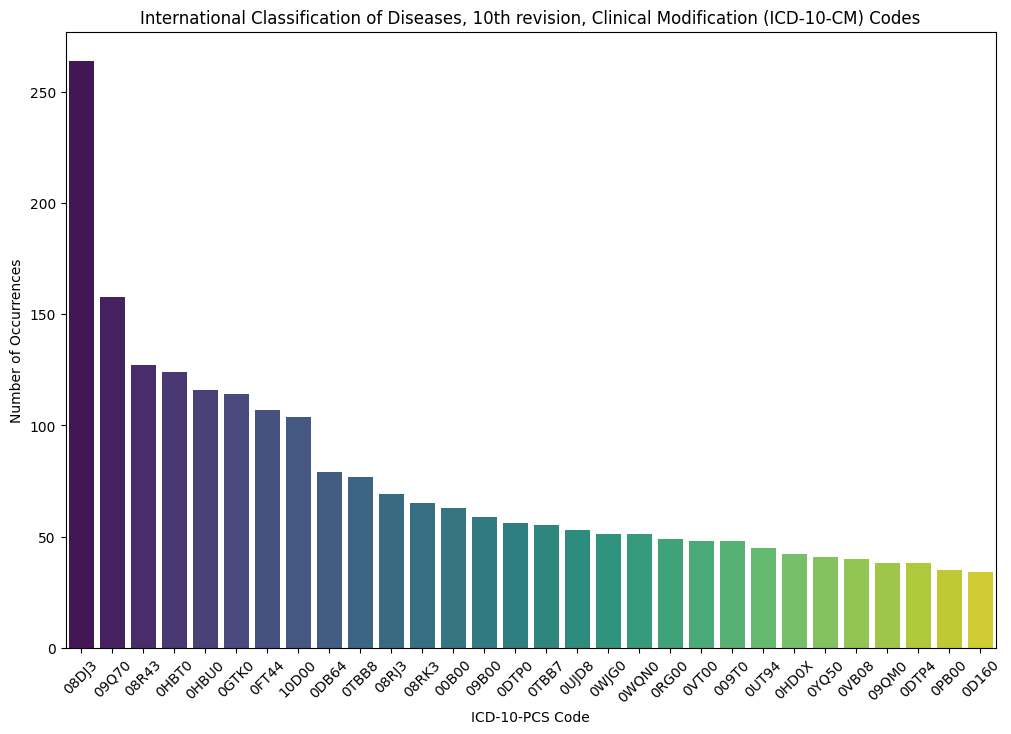

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the top 10 ICD-10-PCS codes
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_icd10_pcs.index, y=top_10_icd10_pcs.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("International Classification of Diseases, 10th revision, Clinical Modification (ICD-10-CM) Codes")
plt.ylabel("Number of Occurrences")
plt.xlabel("ICD-10-PCS Code")
plt.show()

Department

In [20]:
unique_department = df_operations['department'].nunique()
print(unique_department)

14


In [21]:
unique_department = df_operations['department'].unique()
print(unique_department[:16])

['CTS' 'NS' 'GS' 'OS' 'UR' 'OT' 'OG' 'OL' 'PED' 'PS' 'RAD' 'AN' 'IM' 'RO']


In [22]:
top_10_department  = df_operations['department'].value_counts().head(16)
print(top_10_department )

department
GS     1312
OS      664
OT      659
OG      499
UR      467
OL      449
NS      388
CTS     331
PS      205
RAD      14
IM        7
RO        3
PED       1
AN        1
Name: count, dtype: int64


OG: Obstetrics and Gynecology
GS: General Surgery
OS: Orthopedic Surgery
OT: Occupational Therapy (though in a department context, this might mean something else)
CTS: Cardiothoracic Surgery
UR: Urology
OL: Otolaryngology (Ear, Nose, and Throat or ENT)
NS: Neurosurgery or Neurological Surgery
PS: Plastic Surgery
EM: Emergency Medicine
AN: Anesthesiology
RO: Radiation Oncology
IM: Internal Medicine
PED: Pediatrics
DM:  Dhermathology
RAD: Radiology

Anaesthesia type

In [23]:
unique_antype = df_operations['antype'].nunique()
print(unique_antype)

4


In [24]:
unique_antype = df_operations['antype'].unique()
print(unique_antype[:4])

['MAC' 'General' 'Neuraxial' 'Regional']


In [25]:
top_10_antype= df_operations['antype'].value_counts().head(4)
print(top_10_antype)

antype
General      3916
MAC           575
Neuraxial     498
Regional       11
Name: count, dtype: int64


Duration of stay time is dischage time (all tines are shown in minutes)

In [26]:
print(df_operations['admission_time'] [:15])

0       78618
1       22823
2       50604
3       14566
4       12504
5        7807
6       11375
7       46833
8       43996
9       21912
10      50894
11     571409
12      42348
13    2256339
14      17460
Name: admission_time, dtype: int64


In [27]:
print(df_operations['discharge_time'] [:15])

0     1530082
1        8972
2       24979
3       35576
4       52324
5       10749
6       16017
7       21040
8       39704
9       65319
10      35649
11     601958
12      31543
13    2214091
14       9891
Name: discharge_time, dtype: int64


Duration of anesthesia

In [28]:
print(df_operations['anstart_time'] [:15])

0     2.841679e+06
1     1.529713e+03
2     4.749639e+04
3     4.470030e+04
4     3.220559e+03
5     4.182445e+04
6     2.199184e+04
7     1.978078e+04
8     5.636172e+03
9     2.249979e+04
10    4.852008e+03
11    5.776626e+05
12    1.450709e+04
13    1.192710e+06
14    3.956656e+04
Name: anstart_time, dtype: float64


In [29]:
print(df_operations['anend_time'] [:15])

0     2.637132e+06
1     3.466138e+04
2     2.000189e+02
3     1.457811e+04
4     2.562154e+04
5     2.997099e+04
6     9.383038e+03
7     4.223237e+04
8     4.808857e+04
9     2.159683e+04
10    9.137048e+03
11    5.709555e+05
12    2.839456e+04
13    1.202607e+06
14    1.439596e+04
Name: anend_time, dtype: float64


In [30]:
df_operations['an_duration'] = df_operations['anend_time'] - df_operations['anstart_time']
print(df_operations['an_duration'] [:15])

0    -204547.014383
1      33131.670577
2     -47296.367516
3     -30122.192265
4      22400.977699
5     -11853.454147
6     -12608.801634
7      22451.587267
8      42452.393211
9       -902.958414
10      4285.040131
11     -6707.076275
12     13887.475856
13      9896.879489
14    -25170.598406
Name: an_duration, dtype: float64


In [31]:
df_operations.columns

Index(['op_id', 'subject_id', 'hadm_id', 'case_id', 'opdate', 'age', 'sex',
       'weight', 'height', 'race', 'asa', 'emop', 'department', 'antype',
       'icd10_pcs', 'orin_time', 'orout_time', 'opstart_time', 'opend_time',
       'admission_time', 'discharge_time', 'anstart_time', 'anend_time',
       'cpbon_time', 'cpboff_time', 'icuin_time', 'icuout_time',
       'inhosp_death_time', 'an_duration'],
      dtype='object')

Duration of operation

In [32]:
print(df_operations['opstart_time'] [:15])

0     1.185064e+06
1     3.989300e+04
2     3.424141e+04
3     3.635504e+04
4     3.637151e+04
5     1.033012e+04
6     2.424295e+03
7     4.249378e+04
8     4.969535e+04
9     1.045685e+04
10    3.673861e+03
11    5.770359e+05
12    4.608837e+04
13    1.240215e+06
14    2.662765e+04
Name: opstart_time, dtype: float64


In [33]:
print(df_operations['opend_time'] [:15])

0     1.027943e+06
1     2.819608e+04
2     1.970609e+04
3     1.536295e+04
4     4.582673e+04
5     2.312155e+04
6     4.990251e+04
7     4.795383e+03
8     2.013590e+04
9     2.040201e+04
10    4.301653e+04
11    5.874183e+05
12    4.024714e+04
13    1.793672e+06
14    3.245279e+03
Name: opend_time, dtype: float64


In [34]:
df_operations['op_duration'] = df_operations['opend_time'] - df_operations['opstart_time']
print(df_operations['op_duration'] [:15])

0    -157120.917260
1     -11696.923621
2     -14535.318871
3     -20992.095067
4       9455.217741
5      12791.432044
6      47478.213589
7     -37698.402293
8     -29559.451247
9       9945.163482
10     39342.671304
11     10382.464839
12     -5841.231840
13    553457.671284
14    -23382.371673
Name: op_duration, dtype: float64


In [35]:
unique_op_time = df_operations['op_duration'].unique()
print(unique_op_time)

[-157120.9172597   -11696.92362069  -14535.31887063 ...   41743.37522588
  -12483.76183228   -9253.26589842]


In [36]:
top_10_op_time= df_operations['op_duration'].value_counts().head(10)
print(top_10_op_time)

op_duration
-1.571209e+05    1
-2.493280e+04    1
-2.676553e+06    1
-8.831210e+03    1
-7.655917e+03    1
-6.791571e+03    1
 1.285839e+04    1
-4.916667e+04    1
-8.026159e+03    1
-2.556694e+04    1
Name: count, dtype: int64


In [37]:
df_operations.columns

Index(['op_id', 'subject_id', 'hadm_id', 'case_id', 'opdate', 'age', 'sex',
       'weight', 'height', 'race', 'asa', 'emop', 'department', 'antype',
       'icd10_pcs', 'orin_time', 'orout_time', 'opstart_time', 'opend_time',
       'admission_time', 'discharge_time', 'anstart_time', 'anend_time',
       'cpbon_time', 'cpboff_time', 'icuin_time', 'icuout_time',
       'inhosp_death_time', 'an_duration', 'op_duration'],
      dtype='object')

Duration of Cardiopumonary bypass

In [38]:
print(df_operations['cpbon_time'] [:15])

0     2.577912e+06
1     2.611480e+06
2     2.595778e+06
3     2.575863e+06
4     2.605470e+06
5     2.589557e+06
6     2.577153e+06
7     2.573456e+06
8     2.574889e+06
9     2.567251e+06
10    2.567526e+06
11    2.583756e+06
12    2.602689e+06
13    4.688955e+04
14    2.611122e+06
Name: cpbon_time, dtype: float64


In [39]:
unique_cpbon_time = df_operations['cpbon_time'].unique()
print(unique_cpbon_time)

[2577911.54761259 2611479.96639895 2595778.19744353 ... 2572769.67741341
 2596276.3836676  2608410.34525889]


In [40]:
print(df_operations['cpboff_time'] [:15])

0     2.593028e+06
1     2.582872e+06
2     2.605240e+06
3     2.610047e+06
4     2.586330e+06
5     2.607487e+06
6     2.586098e+06
7     2.578770e+06
8     2.600260e+06
9     2.600126e+06
10    2.579656e+06
11    2.570786e+06
12    2.596122e+06
13    2.576255e+06
14    2.603748e+06
Name: cpboff_time, dtype: float64


In [41]:
df_operations['cpb_duration'] = df_operations['cpboff_time'] - df_operations['cpbon_time']
print(df_operations['cpb_duration'] [:15])

0     1.511655e+04
1    -2.860824e+04
2     9.462251e+03
3     3.418380e+04
4    -1.914049e+04
5     1.793010e+04
6     8.945017e+03
7     5.313928e+03
8     2.537074e+04
9     3.287488e+04
10    1.212981e+04
11   -1.297074e+04
12   -6.567523e+03
13    2.529366e+06
14   -7.373815e+03
Name: cpb_duration, dtype: float64


In [42]:
unique_cpb_time = df_operations['cpb_duration'].unique()
print(unique_cpb_time)

[   15116.55120984   -28608.23505993     9462.2513931  ...
    41015.64343671    -8484.92474842 -2557103.17471937]


In [43]:
df_operations.columns

Index(['op_id', 'subject_id', 'hadm_id', 'case_id', 'opdate', 'age', 'sex',
       'weight', 'height', 'race', 'asa', 'emop', 'department', 'antype',
       'icd10_pcs', 'orin_time', 'orout_time', 'opstart_time', 'opend_time',
       'admission_time', 'discharge_time', 'anstart_time', 'anend_time',
       'cpbon_time', 'cpboff_time', 'icuin_time', 'icuout_time',
       'inhosp_death_time', 'an_duration', 'op_duration', 'cpb_duration'],
      dtype='object')

Duration of ICU stay

In [44]:
print(df_operations['icuin_time'] [:15])

0     2.598174e+06
1     2.605391e+06
2     2.583546e+06
3     2.591386e+06
4     4.623223e+03
5     2.592809e+06
6     2.588219e+06
7     2.570376e+06
8     2.567892e+06
9     2.585695e+06
10    2.609442e+06
11    2.601371e+06
12    2.572442e+06
13    2.181063e+04
14    2.582179e+06
Name: icuin_time, dtype: float64


In [45]:
print(df_operations['icuout_time'] [:15])

0     2.594544e+06
1     2.607593e+06
2     2.596706e+06
3     2.585693e+06
4     4.725974e+03
5     2.600996e+06
6     2.616660e+06
7     2.616748e+06
8     2.573189e+06
9     2.572063e+06
10    2.578945e+06
11    2.618197e+06
12    2.582810e+06
13    3.073056e+04
14    2.569725e+06
Name: icuout_time, dtype: float64


In [46]:
df_operations['icu_duration'] = df_operations['icuout_time'] - df_operations['icuin_time']
print(df_operations['icu_duration'] [:15])


0     -3630.234303
1      2201.833732
2     13160.132137
3     -5692.641595
4       102.751644
5      8186.852977
6     28441.628314
7     46371.820060
8      5296.229415
9    -13631.522354
10   -30496.968158
11    16826.412132
12    10367.908773
13     8919.924846
14   -12454.679214
Name: icu_duration, dtype: float64


In [47]:
unique_icu_time = df_operations['icu_duration'].unique()
print(unique_icu_time)

[ -3630.2343025    2201.83373168  13160.13213692 ... -40686.19907502
  29635.90728122  26926.71991278]


In [48]:
df_operations.columns

Index(['op_id', 'subject_id', 'hadm_id', 'case_id', 'opdate', 'age', 'sex',
       'weight', 'height', 'race', 'asa', 'emop', 'department', 'antype',
       'icd10_pcs', 'orin_time', 'orout_time', 'opstart_time', 'opend_time',
       'admission_time', 'discharge_time', 'anstart_time', 'anend_time',
       'cpbon_time', 'cpboff_time', 'icuin_time', 'icuout_time',
       'inhosp_death_time', 'an_duration', 'op_duration', 'cpb_duration',
       'icu_duration'],
      dtype='object')

In hospital death

In [49]:
unique_inhosp_death_time = df_operations['inhosp_death_time'].unique()
print(unique_inhosp_death_time)

[2326923.24940662 2325757.53494349 2326528.62665754 ... 2322018.66453749
 2343446.32846875 2353751.74714938]


Correlation analysis

Correlation values range between -1 and 1. A value close to 1 implies a strong positive correlation: as one variable increases, the other also tends to. A value close to -1 implies a strong negative correlation: as one variable increases, the other tends to decrease.
This analysis only checks for linear relationships. Non-linear relationships won't be captured well by the correlation coefficient.
Correlation does not imply causation. Even if two variables are correlated, it doesn't mean one causes the other.

In [50]:
#Find the correlation between operation duration and age

correlation_with_age = df_operations['op_duration'].corr(df_operations['age'])
print(f"Correlation of operation duration with age: {correlation_with_age}")


Correlation of operation duration with age: -0.017488151965079614


In [51]:
#'Type of surgery' is likely categorical (represented by the icd10_pcs column). Find the average operation duration for each type of surgery

average_duration_per_surgery = df_operations.groupby('icd10_pcs')['op_duration'].mean().sort_values(ascending=False)
print(average_duration_per_surgery)

icd10_pcs
04C50    3.915233e+06
0QW60    3.716010e+06
0DH63    3.444673e+06
0M8R0    3.328687e+06
0RB60    2.766581e+06
             ...     
0WQ80   -2.803176e+06
0UB14   -2.924491e+06
0X6L0   -3.130810e+06
0CB00   -4.497584e+06
08RNX   -4.513078e+06
Name: op_duration, Length: 868, dtype: float64


In [52]:
#Infer post-op ICU admission based on whether icuin_time is non-null. Create a binary column to indicate this and compute its correlation with operation duration.
df_operations['icu_admission_postop'] = ~df_operations['icuin_time'].isna()
correlation_with_icu_admission = df_operations['op_duration'].corr(df_operations['icu_admission_postop'])
print(f"Correlation of operation duration with post-op ICU admission: {correlation_with_icu_admission}")


Correlation of operation duration with post-op ICU admission: nan


c:\Users\20181588\Desktop\code\phd\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\20181588\Desktop\code\phd\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [53]:
correlation_duration_deterioration = df_operations['discharge_time'].corr(df_operations['inhosp_death_time'].notnull().astype(int))
print(f"Correlation between duration of stay and deterioration: {correlation_duration_deterioration}")

Correlation between duration of stay and deterioration: nan


c:\Users\20181588\Desktop\code\phd\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\20181588\Desktop\code\phd\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [54]:
correlation_icu_deterioration = df_operations['icu_duration'].corr(df_operations['inhosp_death_time'].notnull().astype(int))
print(f"Correlation between ICU duration and deterioration: {correlation_icu_deterioration}")

Correlation between ICU duration and deterioration: nan


c:\Users\20181588\Desktop\code\phd\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\20181588\Desktop\code\phd\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [55]:
correlation_age_deterioration = df_operations['age'].corr(df_operations['inhosp_death_time'].notnull().astype(int))
print(f"Correlation between patient's age and deterioration: {correlation_age_deterioration}")

Correlation between patient's age and deterioration: nan


c:\Users\20181588\Desktop\code\phd\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\20181588\Desktop\code\phd\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [56]:
correlation_anesthesia_deterioration = df_operations['an_duration'].corr(df_operations['inhosp_death_time'].notnull().astype(int))
print(f"Correlation between anesthesia time and deterioration: {correlation_anesthesia_deterioration}")

Correlation between anesthesia time and deterioration: nan


c:\Users\20181588\Desktop\code\phd\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\20181588\Desktop\code\phd\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [57]:
deterioration_by_department = df_operations.groupby('department').apply(lambda x: x['inhosp_death_time'].notnull().mean())
print(deterioration_by_department.sort_values(ascending=False))


department
AN     1.0
CTS    1.0
GS     1.0
IM     1.0
NS     1.0
OG     1.0
OL     1.0
OS     1.0
OT     1.0
PED    1.0
PS     1.0
RAD    1.0
RO     1.0
UR     1.0
dtype: float64


In [58]:
correlation_emop_deterioration = df_operations['emop'].corr(df_operations['inhosp_death_time'].notnull().astype(int))
print(f"Correlation between emergency operation and deterioration: {correlation_emop_deterioration}")


Correlation between emergency operation and deterioration: nan


c:\Users\20181588\Desktop\code\phd\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\20181588\Desktop\code\phd\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [59]:
correlation_weight_deterioration = df_operations['weight'].corr(df_operations['inhosp_death_time'].notnull().astype(int))
correlation_height_deterioration = df_operations['height'].corr(df_operations['inhosp_death_time'].notnull().astype(int))
print(f"Correlation between weight and deterioration: {correlation_weight_deterioration}")
print(f"Correlation between height and deterioration: {correlation_height_deterioration}")


Correlation between weight and deterioration: nan
Correlation between height and deterioration: nan


c:\Users\20181588\Desktop\code\phd\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\20181588\Desktop\code\phd\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\20181588\Desktop\code\phd\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\20181588\Desktop\code\phd\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [60]:
# For categorical variables like sex and race, you might want to use groupby and calculate deterioration rates for each group
sex_deterioration_rate = df_operations.groupby('sex').apply(lambda x: x['inhosp_death_time'].notnull().mean())
race_deterioration_rate = df_operations.groupby('race').apply(lambda x: x['inhosp_death_time'].notnull().mean())
print(sex_deterioration_rate)
print(race_deterioration_rate)


sex
F    1.0
M    1.0
dtype: float64
race
Asian    1.0
dtype: float64


In [61]:
correlation_asa_deterioration = df_operations['asa'].corr(df_operations['inhosp_death_time'].notnull().astype(int))
print(f"Correlation between ASA score and deterioration: {correlation_asa_deterioration}")


Correlation between ASA score and deterioration: nan


c:\Users\20181588\Desktop\code\phd\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\20181588\Desktop\code\phd\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [62]:
#Certain surgical procedures might have higher risks associated with them.
procedure_deterioration_rate = df_operations.groupby('icd10_pcs').apply(lambda x: x['inhosp_death_time'].notnull().mean())
print(procedure_deterioration_rate.sort_values(ascending=False).head(30))


icd10_pcs
00100    1.0
0QHF0    1.0
0QB77    1.0
0QB7X    1.0
0QB90    1.0
0QBM0    1.0
0QD60    1.0
0QD70    1.0
0QG00    1.0
0QGG0    1.0
0QH60    1.0
0QH6X    1.0
0QH73    1.0
0QHG0    1.0
0PHV3    1.0
0QHH0    1.0
0QHN0    1.0
0QJ70    1.0
0QN60    1.0
0QN70    1.0
0QNH0    1.0
0QP80    1.0
0QPH0    1.0
0QPM0    1.0
0QQ60    1.0
0QQ70    1.0
0Q9H0    1.0
0Q9C0    1.0
0Q8N0    1.0
0PU00    1.0
dtype: float64


In [63]:
df_operations['time_to_icu_postop'] = df_operations['icuin_time'] - df_operations['opend_time']
correlation_time_to_icu_deterioration = df_operations['time_to_icu_postop'].corr(df_operations['inhosp_death_time'].notnull().astype(int))
print(f"Correlation between time to ICU post-operation and deterioration: {correlation_time_to_icu_deterioration}")


c:\Users\20181588\Desktop\code\phd\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


Correlation between time to ICU post-operation and deterioration: nan


c:\Users\20181588\Desktop\code\phd\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [64]:

correlation_icu_stay_deterioration = df_operations['icu_duration'].corr(df_operations['inhosp_death_time'].notnull().astype(int))
print(f"Correlation between ICU stay duration and deterioration: {correlation_icu_stay_deterioration}")


Correlation between ICU stay duration and deterioration: nan


c:\Users\20181588\Desktop\code\phd\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\20181588\Desktop\code\phd\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [65]:
department_deterioration_rate = df_operations.groupby('department').apply(lambda x: x['inhosp_death_time'].notnull().mean())
print(department_deterioration_rate.sort_values(ascending=False))


department
AN     1.0
CTS    1.0
GS     1.0
IM     1.0
NS     1.0
OG     1.0
OL     1.0
OS     1.0
OT     1.0
PED    1.0
PS     1.0
RAD    1.0
RO     1.0
UR     1.0
dtype: float64


In [66]:
antype_deterioration_rate = df_operations.groupby('antype').apply(lambda x: x['inhosp_death_time'].notnull().mean())
print(antype_deterioration_rate.sort_values(ascending=False))


antype
General      1.0
MAC          1.0
Neuraxial    1.0
Regional     1.0
dtype: float64


In [69]:
import pandas as pd

# Assuming df is your DataFrame with the INSPIRE dataset
# And the function is being passed the dataframe and a subject_id to look for
def print_patient_operation_details(df, subject_id):
    # Filter the DataFrame for the given subject_id
    patient_data = df[df['subject_id'] == subject_id]
    
    # Extracting the relevant information
    operation_begin = patient_data['opstart_time'].dropna()
    operation_end = patient_data['opend_time'].dropna()
    icu_in = patient_data['icuin_time'].dropna()
    icu_out = patient_data['icuout_time'].dropna()
    discharge_time = patient_data['admission_time'].dropna() # Verify if 'admission_time' is correct for discharge time
    death_time = patient_data['inhosp_death_time'].dropna() # Verify if 'inhosp_death_time' is correct for hospital death time
    department_info = patient_data['department'].dropna()
    icd10_pcs_codes = patient_data['icd10_pcs'].dropna()
    anesthesia_start = patient_data['anstart_time'].dropna() # Assuming 'anestart_time' is the column for anesthesia start time
    anesthesia_end = patient_data['anend_time'].dropna() # Assuming 'aneend_time' is the column for anesthesia end time
    
    # Print the details
    if not operation_begin.empty:
        print(f"Operation start time(s) for subject_id {subject_id}: {operation_begin.values}")
    else:
        print(f"No operation start time found for subject_id {subject_id}")
    
    if not operation_end.empty:
        print(f"Operation end time(s) for subject_id {subject_id}: {operation_end.values}")
    else:
        print(f"No operation end time found for subject_id {subject_id}")
    
    if not icu_in.empty:
        print(f"ICU admission time(s) for subject_id {subject_id}: {icu_in.values}")
    else:
        print(f"No ICU admission time found for subject_id {subject_id}")
    
    if not icu_out.empty:
        print(f"ICU discharge time(s) for subject_id {subject_id}: {icu_out.values}")
    else:
        print(f"No ICU discharge time found for subject_id {subject_id}")
    
    if not discharge_time.empty:
        print(f"Discharge time(s) for subject_id {subject_id}: {discharge_time.values}")
    else:
        print(f"No discharge time found for subject_id {subject_id}")
    
    if not death_time.empty:
        print(f"Hospital death time(s) for subject_id {subject_id}: {death_time.values}")
    else:
        print(f"No hospital death time found for subject_id {subject_id}")
    
    if not department_info.empty:
        print(f"Department(s) for subject_id {subject_id}: {department_info.values}")
    else:
        print(f"No department information found for subject_id {subject_id}")
    
    if not icd10_pcs_codes.empty:
        print(f"ICD-10-PCS code(s) for subject_id {subject_id}: {icd10_pcs_codes.values}")
    else:
        print(f"No ICD-10-PCS codes found for subject_id {subject_id}")
    
    if not anesthesia_start.empty:
        print(f"Anesthesia start time(s) for subject_id {subject_id}: {anesthesia_start.values}")
    else:
        print(f"No anesthesia start time found for subject_id {subject_id}")
    
    if not anesthesia_end.empty: 
        print(f"Anesthesia end time(s) for subject_id {subject_id}: {anesthesia_end.values}")
    else:
        print(f"No anesthesia end time found for subject_id {subject_id}")

# Example usage:
# Replace 'your_dataframe' with the variable name of your actual DataFrame
print_patient_operation_details(df=df_operations, subject_id=198631209)


Operation start time(s) for subject_id 198631209: [39893.00186626]
Operation end time(s) for subject_id 198631209: [28196.07824557]
ICU admission time(s) for subject_id 198631209: [2605391.32908894]
ICU discharge time(s) for subject_id 198631209: [2607593.16282061]
Discharge time(s) for subject_id 198631209: [22823]
Hospital death time(s) for subject_id 198631209: [2325757.53494349]
Department(s) for subject_id 198631209: ['NS']
ICD-10-PCS code(s) for subject_id 198631209: ['0VT00']
Anesthesia start time(s) for subject_id 198631209: [1529.7129788]
Anesthesia end time(s) for subject_id 198631209: [34661.38355595]


[121054734 198631209 174969512 178985173 115260075 182676977 181724298
 186957590 196709068 121798698 146627427 170776624 110422967 165393967
 150995715 160905993 126081346 117719117 132913626 161055594 184311510
 180464848 132878481 125052097 170084078 159537094 197380989 137295160
 190883278 128975148]